In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle

# How to read raw data files

In [2]:
def flatten_list(ll):
    flat = []
    for i in range(0, len(ll)):
        flat.extend(ll[i])
    return np.array(flat)

In [3]:
peak_folder = '/Users/emiliebertholet/cernbox/coldbox_data/raw_waveforms' ## put your own path

sample = 'cosmics'

with open(f'{peak_folder}/waveforms_{sample}_wlenNone_prom500.pkl', 'rb') as file:
    data = pickle.load(file)

print(f"{sample}:  {len(flatten_list(data['peak_indices_2d']))} peaks, {len(data['peak_indices_2d'])} trigger records")
data.keys()


cosmics:  27508 peaks, 4200 trigger records


dict_keys(['peak_indices_2d', 'peak_heights', 'properties', 'waveforms', 'flat_peak_indices', 'pedestals'])

# File Organization

The files contain a dictionary:
- ```peak_indices_2d```: peak positions in the original file: first index is the trigger record and the second is the position of the peak within the trigger record (i.e the 2D array structure of the original file is preserved)

- ```peak_heights```: the height of the peaks after pedestal subtraction [2d array]

- ```waveforms```: each waveform is an array different length [2d array]

- ```pedestals```: the value of the pedestal for each trigger record [1d array]

- ```properties```: a dictionary with additional properties (eg. widths)

- ```flat_peak_indices```: not useful anymore



### How to get the information related to the 4th waveform contained in the trigger record number 93?

height of the peak after pedestal subtraction:  506 ADC
height of the peak before pedestal subtraction: 1849 ADC


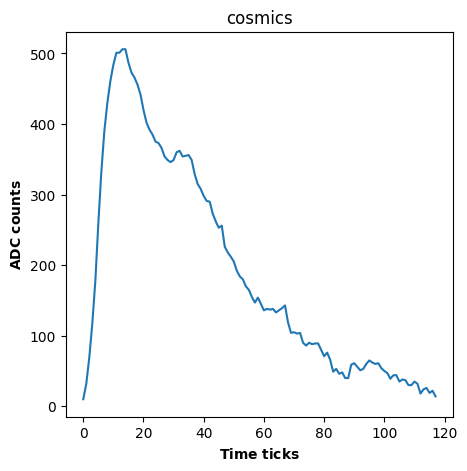

In [4]:
trigger_rec   = 93
waveform_idx = 3
print(f"height of the peak after pedestal subtraction:  {data['peak_heights'][trigger_rec][waveform_idx]} ADC")
print(f"height of the peak before pedestal subtraction: {data['peak_heights'][trigger_rec][waveform_idx]+data['pedestals'][trigger_rec]} ADC")

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(data['waveforms'][trigger_rec][waveform_idx].transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title(sample);
